# Hadi Babalou - 810199380

Artificial Intelligence - CA#05: *Machine Learning* - Spring 2023
In this notebook, we will implement some machine learning algorithms to classify house prices based on their features.

## 1. Exploratory Data Analysis

In [12]:
import pandas as pd
import math

Let's load the dataset and see what we have here.

In [13]:
house_df = pd.read_csv('house_data.csv')


### 1.1 Data Overview

The `head()` function is a method that can be called on a pandas DataFrame or Series object in Python. It returns the first n rows of the DataFrame or Series, where n is a specified number (by default n=5).

In [14]:
house_df.head()


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,...,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,...,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,...,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,...,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,...,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35


When called on a DataFrame object, the `head()` function returns the first n rows of the DataFrame, which can be useful for quickly examining the structure and contents of the data.

The `info()` function is a method that can be called on a pandas DataFrame object in Python. It provides a concise summary of the DataFrame, including information about the data types of each column, the number of non-null values in each column, and the total memory usage of the DataFrame.

In [15]:
house_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

The `info()` function can be useful for quickly understanding the structure of a DataFrame, including the data types of each column and whether there are any missing values. It can also be useful for identifying potential issues with memory usage, as it provides an estimate of the total memory usage of the DataFrame.

The `describe()` function is a method that can be called on a pandas DataFrame or Series object in Python. It provides a quick statistical summary of the data, including measures of central tendency, dispersion, and shape of the distribution.

In [16]:
house_df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,...,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,...,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,...,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


When called on a DataFrame object, the `describe()` function returns a summary of the numerical columns in the DataFrame. This includes following properties for each column:
- count:    The number of data entries
- mean:     The average of the data
- std:      The standard deviation of the data
- min:      The minimum value
- 25%:      The first quartile of data (25th percentile)
- 50%:      The median (50th percentile)
- 75%:      The third quartile of data (75th percentile)
- max:      The maximum value 

As we can see, the ```Unnamed: 0```, ```Unnamed: 0.1```, and ```Unnamed: 0.2``` columns are just the index of the rows and we can drop them.

In [17]:
house_df.drop('Unnamed: 0', axis=1, inplace=True)
house_df.drop('Unnamed: 0.1', axis=1, inplace=True)
house_df.drop('Unnamed: 0.2', axis=1, inplace=True)
house_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,1.0,0,0,...,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,NaN,0,0,...,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,1.0,0,0,...,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,1.0,0,0,...,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,1.0,0,0,...,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35


### 1.2 Missing Values 

In this section, we will check if there are any missing values in the dataset. For each column, we will calculate the count and the percentage of missing values and store them in ```missing_df``` dataframe if there are any missing values.

In [18]:
missing_df_rows = ['Count', 'Ratio']
missing_df = pd.DataFrame(columns=missing_df_rows)
for col in house_df.columns:
    print(f'{col:<18} Count: {house_df[col].isnull().sum():<10} Ratio: {house_df[col].isnull().sum() / len(house_df[col]):.3f}')
    if house_df[col].isnull().sum() > 0:
        missing_df.loc[col] = [house_df[col].isnull().sum(), house_df[col].isnull().sum() / len(house_df[col])]

missing_df.sort_values(by=['Ratio'], ascending=False, inplace=True)


id                 Count: 0          Ratio: 0.000
date               Count: 0          Ratio: 0.000
price              Count: 0          Ratio: 0.000
bedrooms           Count: 0          Ratio: 0.000
bathrooms          Count: 0          Ratio: 0.000
sqft_living        Count: 3085       Ratio: 0.143
sqft_lot           Count: 0          Ratio: 0.000
floors             Count: 3083       Ratio: 0.143
waterfront         Count: 0          Ratio: 0.000
view               Count: 0          Ratio: 0.000
condition          Count: 0          Ratio: 0.000
grade              Count: 0          Ratio: 0.000
sqft_above         Count: 0          Ratio: 0.000
sqft_basement      Count: 429        Ratio: 0.020
yr_built           Count: 3082       Ratio: 0.143
yr_renovated       Count: 0          Ratio: 0.000
zipcode            Count: 0          Ratio: 0.000
lat                Count: 0          Ratio: 0.000
long               Count: 0          Ratio: 0.000
sqft_living15      Count: 0          Ratio: 0.000


### 1.3 Correlation Heatmap

In this section, we will plot a heatmap of the correlation matrix of the dataset. We will use the ```seaborn``` library to plot the heatmap.  


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = house_df.corr(method='pearson', numeric_only=True)


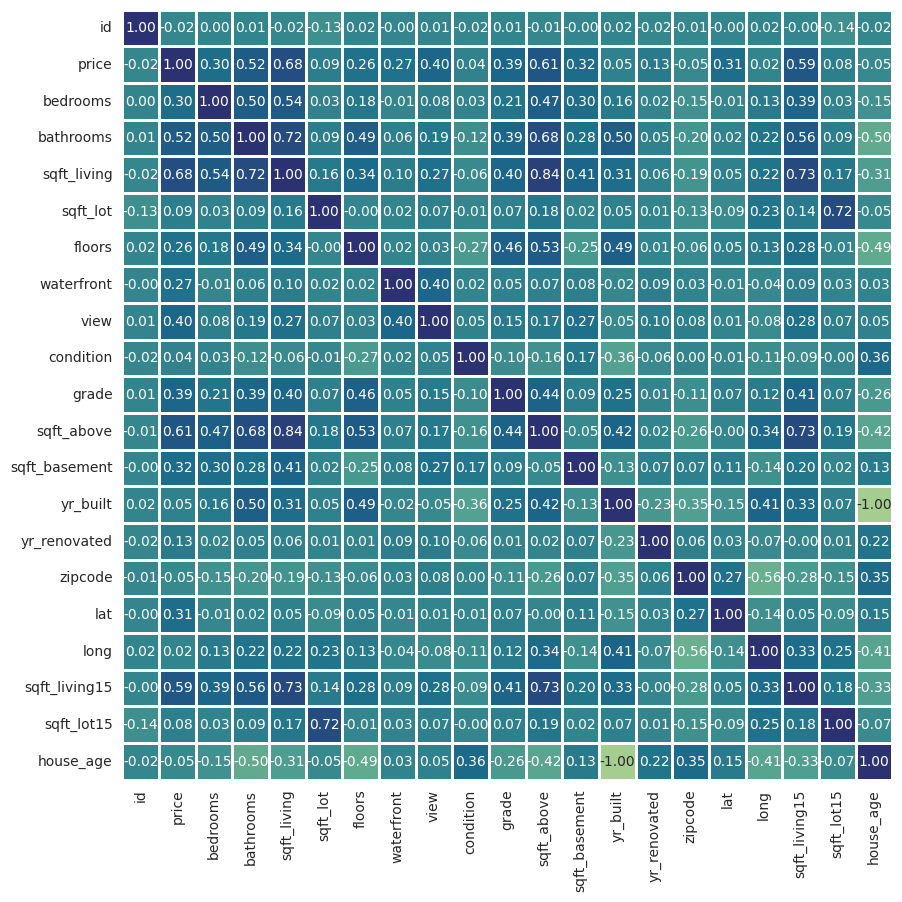

In [20]:
sns.set_style('whitegrid')
color_map = sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=2, cbar=False, cmap=color_map, square=True)
plt.show()

We want to figure out which columns have the most correlation with the ```price``` column. 

In [21]:
outcomes = correlation_matrix['price'].drop('price').sort_values(ascending=False)
outcomes
    

sqft_living      0.676542
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.517952
view             0.397346
grade            0.389227
sqft_basement    0.321825
lat              0.306919
bedrooms         0.304521
waterfront       0.266331
floors           0.258603
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.054118
condition        0.036392
long             0.021571
id              -0.016797
zipcode         -0.053168
house_age       -0.053982
Name: price, dtype: float64

As we can see, the ```sqft_living```, ```sqft_above```, ```sqft_living15```, and ```bathrooms``` columns have the most correlation with the ```price``` column.

### 1.4 Unique Values

Now we plot the count of each unique value in columns with the most correlation with the ```price``` column. 

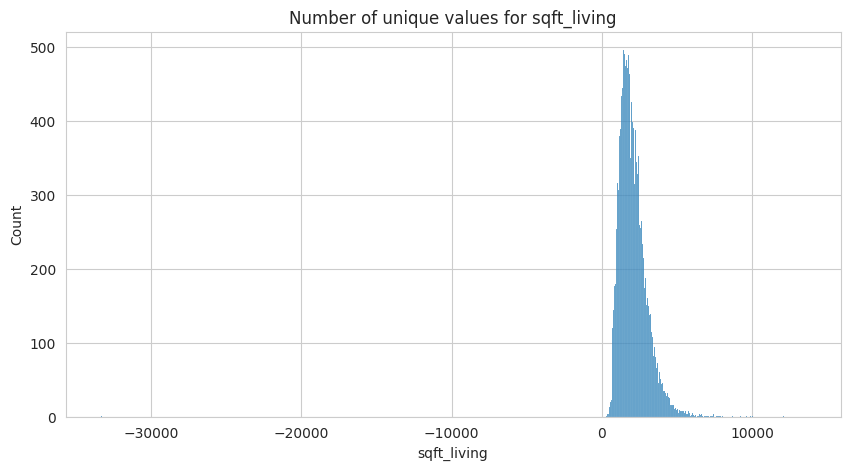

col: sqft_living     min: -33323.0     max: 13540.0


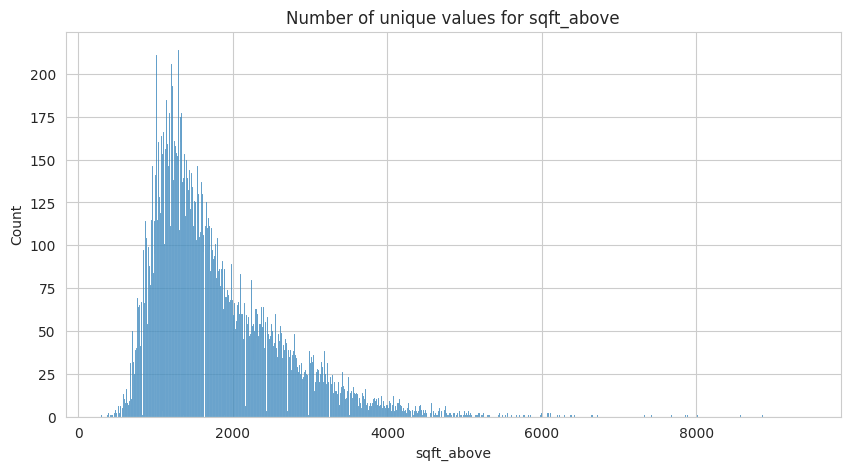

col: sqft_above     min: 290     max: 9410


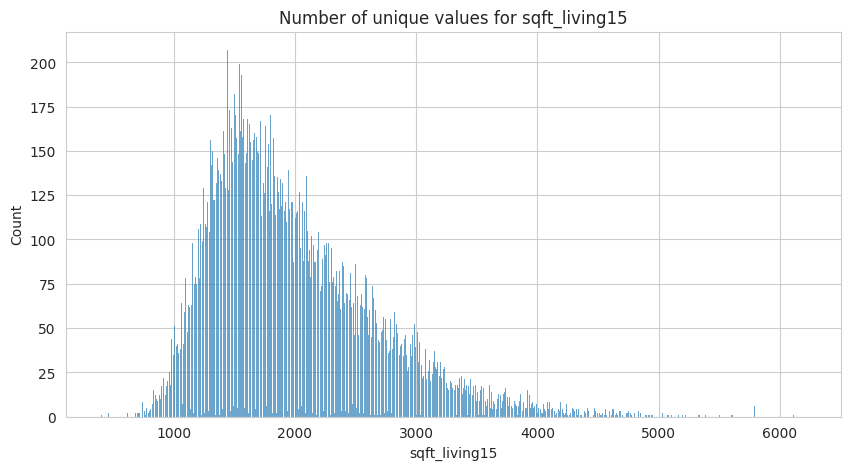

col: sqft_living15     min: 399     max: 6210


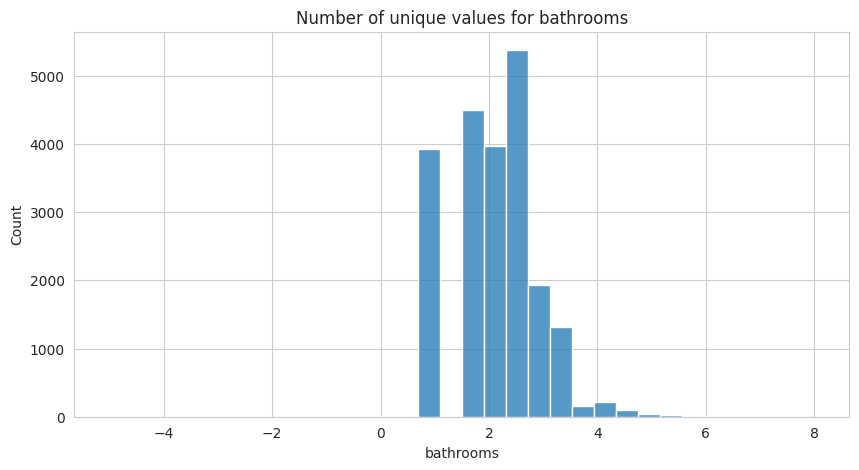

col: bathrooms     min: -5.0     max: 8.0


In [22]:
selected_features_count = 4
for col in outcomes.index[:selected_features_count]:
    plt.figure(figsize=(10, 5))
    sns.histplot(house_df[col], bins=len(house_df[col].unique()))
    plt.title(f'Number of unique values for {col}')
    plt.show()
    print(f'col: {col}     min: {house_df[col].min()}     max: {house_df[col].max()}')


### Handling Outliers

Some negative values can be seen in the ```sqft_living```, ```sqft_above```, ```sqft_living15```, and ```bathrooms``` columns. We will remove these outliers from the dataset.

In [23]:
house_df.drop(house_df.index[house_df['sqft_living'] < 0], inplace=True)

In [24]:
house_df.drop(house_df.index[house_df['sqft_above'] < 0], inplace=True)

In [25]:
house_df.drop(house_df.index[house_df['sqft_living15'] < 0], inplace=True)

In [26]:
house_df.drop(house_df.index[house_df['bathrooms'] < 0], inplace=True)

### 1.5 Visualizing Correlation Between Features and Target

In this section, we will plot the correlation between the features and the target using scatter and hexbin plots. 


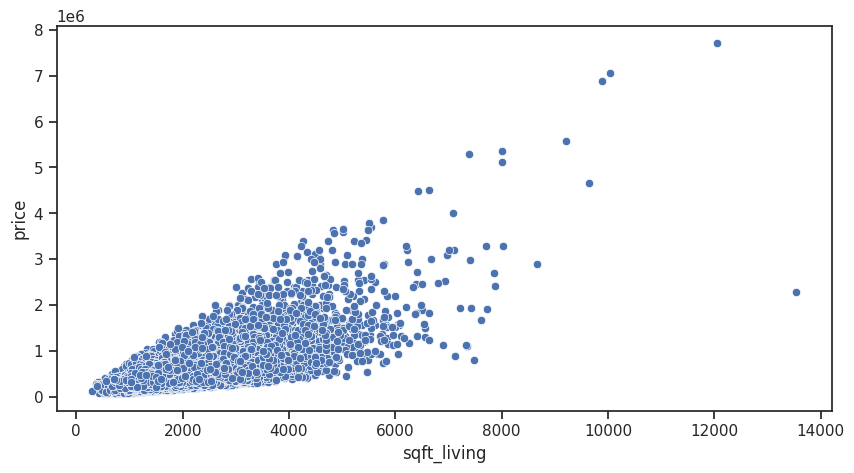

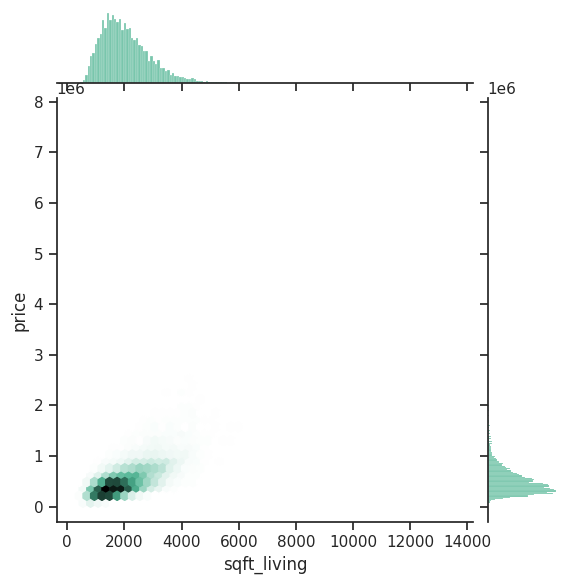

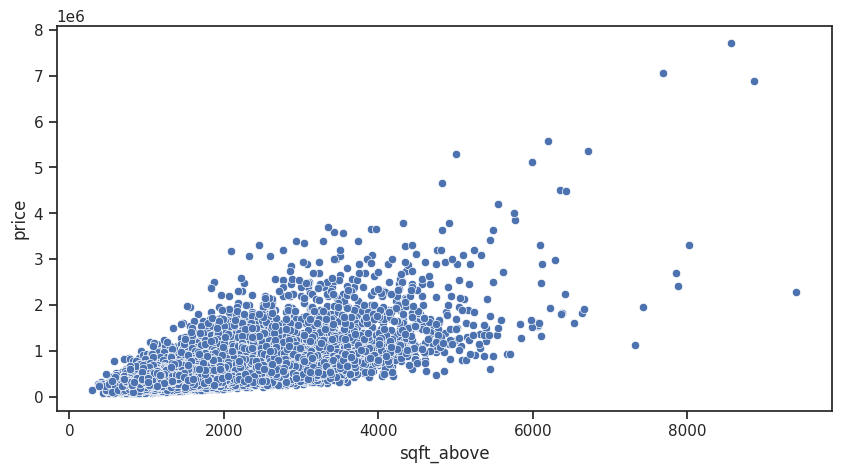

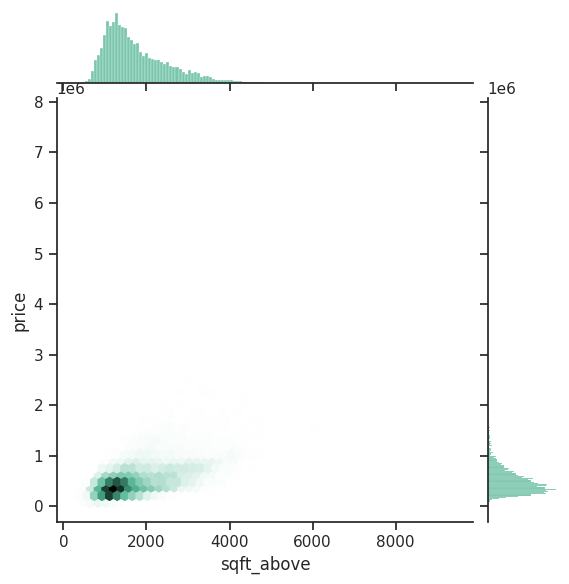

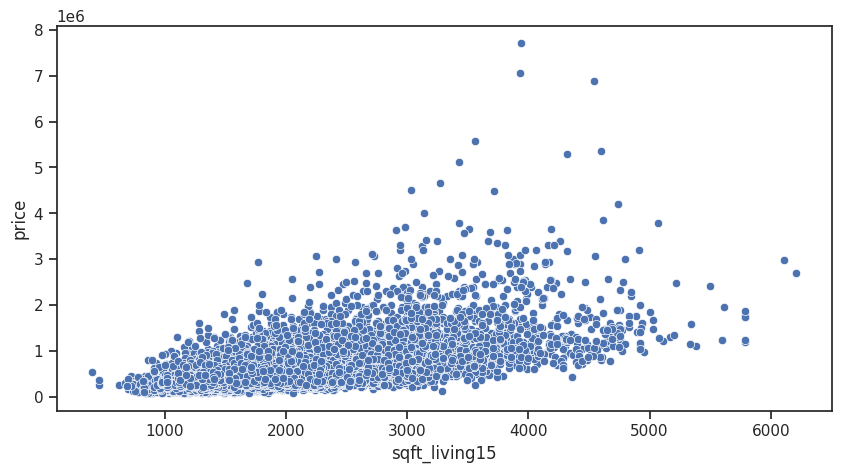

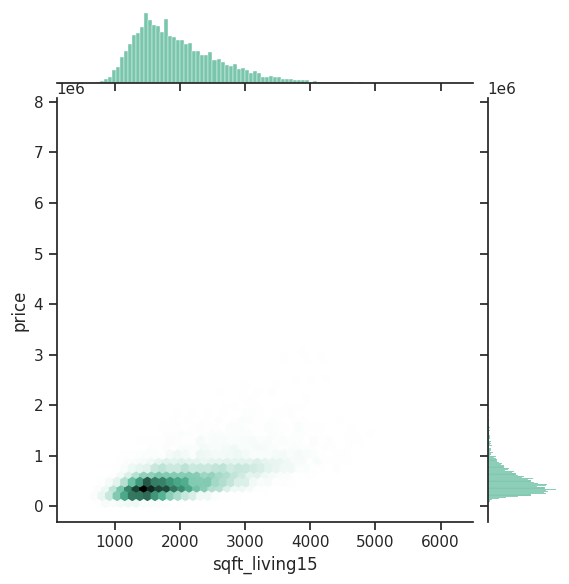

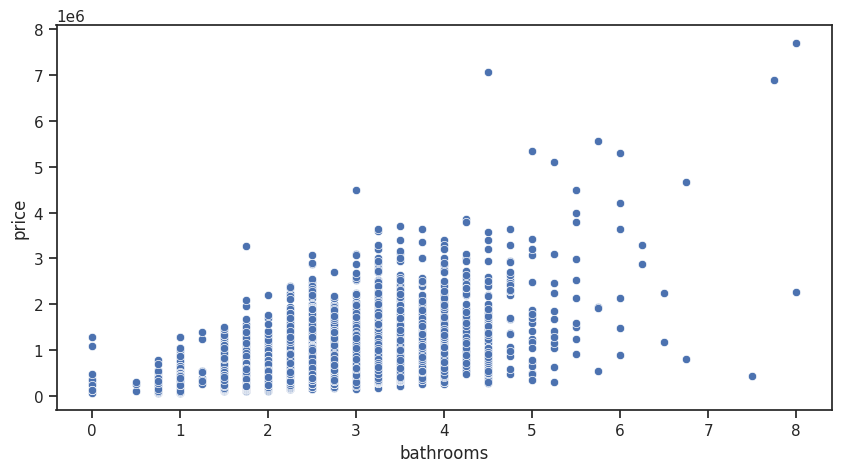

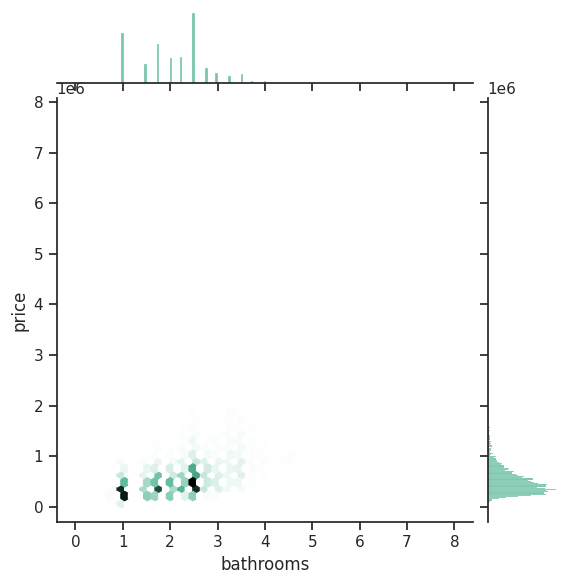

In [27]:
sns.set_theme(style="ticks")
for col in outcomes.index[:selected_features_count]:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=col, y='price', data=house_df)
    sns.jointplot(x=col, y='price', data=house_df, kind='hex', color="#4CB391")
    plt.show()

## 2. Perprocessing

In ```Handling Outliers``` section, we removed some outliers from the dataset.

### 2.1 Missing Values

There are several ways to handle missing numerical values in a dataset, some of which include:

- Deleting rows with missing values: This approach simply removes any rows that contain missing values, but it can be problematic if a large portion of the dataset contains missing values.

- Imputing with mean or median: This method involves replacing the missing values with the mean or median of the existing values in that column. This approach can work well if the distribution of the data is normal, but it may not be suitable for skewed data.

- Imputing with regression: This method involves using a regression model to predict the missing values based on other variables in the dataset. This approach can work well if there is a strong correlation between the missing value and other variables in the dataset.

- Using a clustering algorithm: This method involves using clustering algorithms to group similar data points together and then imputing the missing values with the mean or median value of the cluster. This approach can work well if there is a clear clustering structure in the data.

- Using the K-Nearest Neighbors algorithm: This method involves finding the K nearest neighbors of the missing value and imputing the missing value with the average of the K nearest neighbors. This approach can work well if there is a strong correlation between the missing value and its nearest neighbors.

The choice of method depends on the nature of the missing data and the analysis goals.

Also There are different ways to handle missing categorical values in a dataset, including:

- Deleting the missing data: If the missing values are a small proportion of the data, you can delete the rows with missing values. However, this may result in a reduction in the size of the dataset and the loss of important information.

- Imputing missing values: You can use various methods to impute missing values in categorical data, such as:

    1. Mode imputation: Replacing missing values with the most common value in the dataset or the most common value in a particular category.

    2. Similarity-based imputation: Replacing missing values with the values of the nearest neighbors in the dataset or a similar subset of the dataset.

    3. Probabilistic imputation: Using probabilistic models to estimate missing values based on the observed data.

- Creating a separate category: If the missing values represent a significant proportion of the data, you can create a separate category to represent the missing values. This can help retain the information in the dataset and prevent the loss of important data.

- Using machine learning algorithms: You can use machine learning algorithms that can handle missing data, such as decision trees and random forests, which can automatically handle missing categorical values during training and testing.

The chosen method should be appropriate for the type and amount of missing data, and it should not introduce any bias or distortions in the analysis. 

### 2.2 Handling Missing Values

First we take a look at the columns with missing values.

In [28]:
missing_df

,Count,Ratio
sqft_living,3085.0,0.142738
floors,3083.0,0.142646
yr_built,3082.0,0.142599
sqft_basement,429.0,0.019849


Now we should handle the missing values in this columns.

#### 2.2.1 Filling Missing Values of ```sqft_living``` feature

In [29]:
house_df['sqft_living'].describe()

count    18517.000000
mean      2079.378517
std        917.910856
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

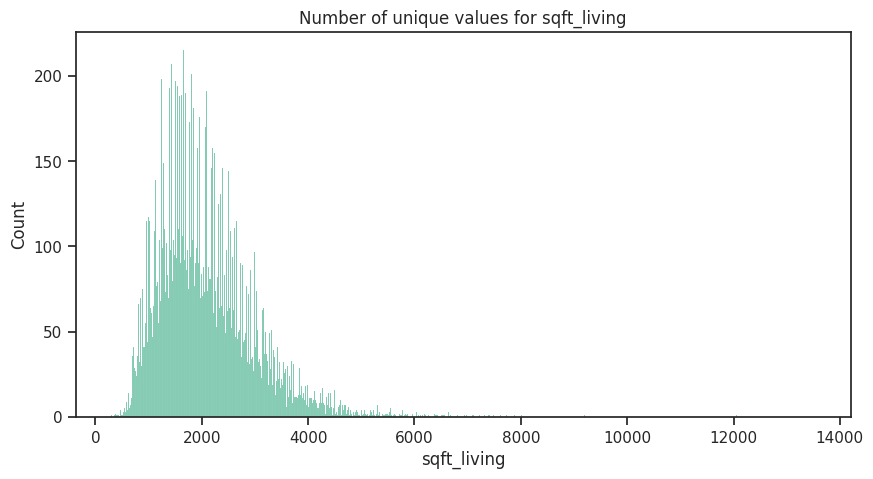

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(house_df['sqft_living'], bins=len(house_df['sqft_living'].unique()), color="#4CB391")
plt.title(f'Number of unique values for sqft_living')
plt.show()


In [31]:
house_df['sqft_living'].fillna(house_df['sqft_living'].mean(), inplace=True)

#### 2.2.2 Filling Missing Values of ```floors``` feature

In [32]:
house_df['floors'].describe()

count    18518.000000
mean         1.492791
std          0.538509
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

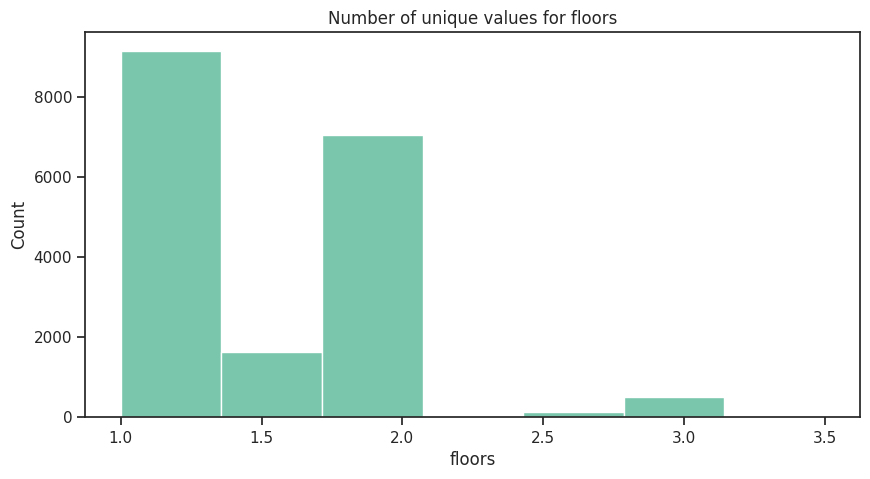

In [33]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(house_df['floors'], bins=len(house_df['floors'].unique()), color="#4CB391")
plt.title(f'Number of unique values for floors')
plt.show()

In [34]:
house_df['floors'].fillna(house_df['floors'].mode()[0], inplace=True)

#### 2.2.3 Filling Missing Values of ```yr_built``` feature

In [35]:
house_df['yr_built'].describe()

count    18520.000000
mean      1970.887257
std         29.409215
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

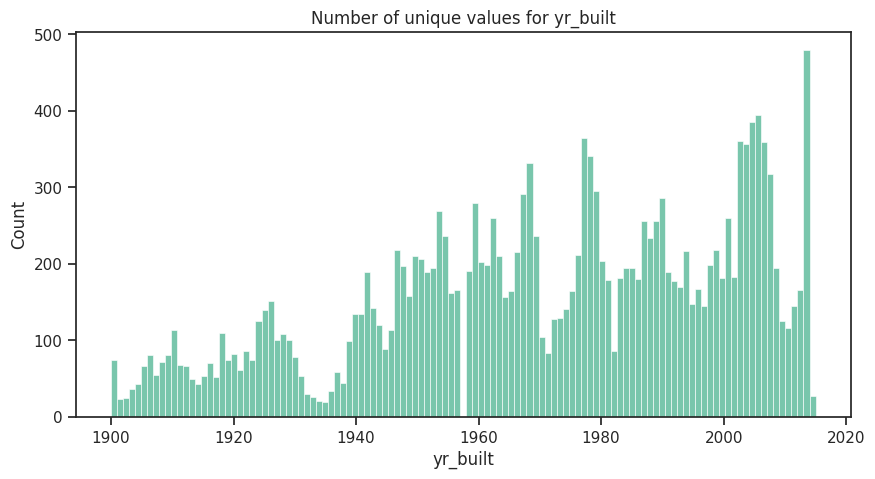

In [36]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(house_df['yr_built'], bins=len(house_df['yr_built'].unique()), color="#4CB391")
plt.title(f'Number of unique values for yr_built')
plt.show()


In [37]:
house_df['yr_built'].fillna(house_df['yr_built'].mean(), inplace=True)

#### 2.2.4 Filling Missing Values of ```sqft_basement``` feature

In [38]:
house_df['sqft_basement'].describe()

count    21172.000000
mean       292.102919
std        442.628638
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

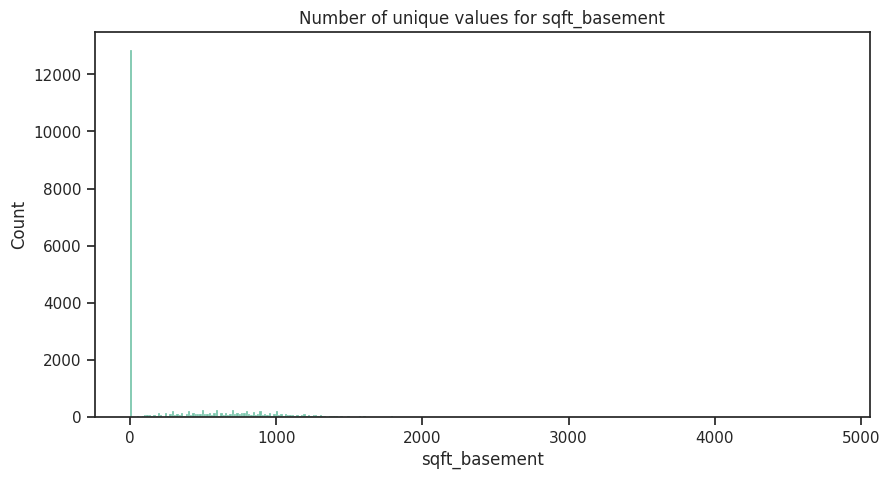

In [39]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(house_df['sqft_basement'], bins=len(house_df['sqft_basement'].unique()), color="#4CB391")
plt.title(f'Number of unique values for sqft_basement')
plt.show()


In [40]:
house_df['sqft_basement'].fillna(house_df['sqft_basement'].mode()[0], inplace=True)

### 2.3 Normalization and Standardization

Normalization and standardization are two common techniques for scaling numerical data. 
Normalization is the process of scaling individual samples to have unit norm (i.e., a length of 1), while standardization is the process of scaling the features so that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
nrm_scaler = MinMaxScaler()
numerical_columns = house_df.select_dtypes(include=['int64', 'float64']).columns 

numerical_columns = numerical_columns.drop('price')

# house_df[numerical_columns] = std_scaler.fit_transform(house_df[numerical_columns])
house_df[numerical_columns] = nrm_scaler.fit_transform(house_df[numerical_columns])

house_df[['sqft_living', 'price']].head()


,sqft_living,price
0,0.067170,221900.0
1,0.172075,538000.0
2,0.036226,180000.0
3,0.126038,604000.0
4,0.104906,510000.0


### 2.4 Category Encoding

Categorical label encoding is a process of converting categorical data into numerical data. There are several approaches for categorical label encoding, including:

- Ordinal Encoding: This approach assigns a unique integer to each category, in a specified order. For example, if we have a categorical variable with three categories (A, B, C), we could assign the integers 1, 2, and 3 to these categories in the order A, B, C. The resulting numerical data can be used in machine learning algorithms that require numerical inputs.

- One-Hot Encoding: This approach creates a binary column for each category, where each row has a 1 in the column corresponding to its category and 0 in all other columns. For example, if we have a categorical variable with three categories (A, B, C), we could create three binary columns labeled A, B, and C, where each row has a 1 in the column corresponding to its category and 0 in all other columns. One-hot encoding is often used for nominal categorical variables, where there is no intrinsic ordering to the categories.

- Binary Encoding: This approach creates binary columns for each category, similar to one-hot encoding, but uses binary code to represent the categories. Binary encoding works by converting each category to a binary number and then using the bits in the binary number as the values for the binary columns. For example, if we have a categorical variable with four categories (A, B, C, D), we could assign the binary values 00, 01, 10, and 11 to these categories, and then create two binary columns labeled C1 and C2, where C1 corresponds to the first bit and C2 corresponds to the second bit.

- Frequency Encoding: This approach assigns a numerical value to each category based on its frequency in the dataset. For example, if we have a categorical variable with three categories (A, B, C), and category A appears in 50% of the rows, category B in 30% of the rows, and category C in 20% of the rows, we could assign the values 0.5, 0.3, and 0.2 to these categories, respectively.

- Target Encoding: This approach assigns a numerical value to each category based on the target variable's mean for that category. For example, if we have a categorical variable with three categories (A, B, C), and we are predicting a binary target variable (0 or 1), we could calculate the mean target value for each category and assign these mean values to the categories. Target encoding can be a powerful technique for categorical data that is highly predictive of the target variable.

Each approach has its advantages and disadvantages, and the choice of encoding method depends on the nature of the data and the requirements of the model.

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

categorical_columns = house_df.select_dtypes(include=['object']).columns
categorical_columns

# house_df[categorical_columns] = LabelEncoder().fit_transform(house_df[categorical_columns])
# house_df[categorical_columns] = OrdinalEncoder().fit_transform(house_df[categorical_columns])
# house_df[categorical_columns] = OneHotEncoder().fit_transform(house_df[categorical_columns])

Index(['date', 'location', 'style'], dtype='object')

In [43]:
house_df[categorical_columns].head()


,date,location,style
0,20141013T000000,Suburban,Contemporary
1,20141209T000000,Suburban,Ranch
2,20150225T000000,Rural,Victorian
3,20141209T000000,Urban,Colonial
4,20150218T000000,Suburban,Cape Cod


In [44]:
import numpy as np

for col in categorical_columns:

    if col == 'date':
        sorted_dates = sorted(house_df[col].unique())
        dates_dict = {date: i for i, date in enumerate(sorted_dates)}
        house_df[col] = house_df[col].map(dates_dict)
        
    else:
        label_encoder = LabelEncoder()
        house_df[col] = label_encoder.fit_transform(house_df[col])

house_df[categorical_columns].head()

,date,location,style
0,164,1,2
1,220,1,3
2,290,0,4
3,220,2,1
4,283,1,0


### 2.5 Dropping Unnecessary Features

The ```Unnamed: 0```, ```Unnamed: 0.1```, and ```Unnamed: 0.2``` columns were just the index of the rows and are not needed for our analysis, so we dropped them.

### 2.6 Splitting Data

To evaluate the performance of our model, we split the data into training and testing sets. 
We use training data to train the model and testing data to evaluate the model's performance on unseen data. 

We use train_test_split() function from sklearn.model_selection to split the data into training and testing sets. this function first shuffles the data and then splits it into training and testing sets according to the specified test size.



In [45]:
from sklearn.model_selection import train_test_split

SPLIT_RATIO = 0.2
RANDOM_STATE = 18

X = house_df.drop('price', axis=1)
y = house_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SPLIT_RATIO, random_state=RANDOM_STATE)


There are several approaches for splitting data into training and testing sets, including:
* ```Random Splitting```: This approach randomly splits the data into training and testing sets. This approach is simple and easy to implement, but it can result in a high variance in the performance of the model on different splits of the data.
* ```Stratified Splitting```: This approach splits the data into training and testing sets such that the distribution of the target variable is the same in both sets. This approach can help reduce the variance in the performance of the model on different splits of the data.
* ```Time-Based Splitting```: This approach splits the data into training and testing sets based on a specified time point. This approach can help reduce the variance in the performance of the model on different splits of the data.
* ```Cross-Validation```: This approach splits the data into training and testing sets multiple times and evaluates the model on each split. This approach can help reduce the variance in the performance of the model on different splits of the data.

### 2.7 Validation Set

A validation set is a portion of the labeled dataset that is used to assess the performance and tune the hyperparameters of a machine learning model during the training process. The validation set serves as an intermediate evaluation step between the training and testing stages.

The validation set is used to fine-tune the model's hyperparameters and evaluate its performance during training. It helps in assessing the model's ability to generalize to unseen data and provides insights into potential overfitting or underfitting issues. The validation set should be representative of the real-world data distribution but should not be used for training.


The primary purpose of having a validation set is to monitor and optimize the model's performance while training, as well as to prevent overfitting. By evaluating the model's performance on the validation set, you can make adjustments to hyperparameters, model architecture, or regularization techniques to improve its performance before evaluating it on the test set.

It's important to note that the validation set should be kept separate from the training set and test set to ensure an unbiased evaluation of the model's performance.

## 3. Learning and Evaluation

### 3.1 Linear Regression

Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\beta$) and slope($\alpha$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$



The goal of simple linear regression is to find the values of $\alpha$ and $\beta$ that best fit the data.
To find the values of $\alpha$ and $\beta$, we use the method of least squares. This involves minimizing the sum of the squared differences between the predicted values of the dependent variable and the actual values of the dependent variable. This sum is known as the residual sum of squares (RSS).

#### 3.1.1 Linear Regression Model

In [46]:
def simple_linear_regression(input_feature, output):

    input_feature_mean = input_feature.mean()
    output_mean = output.mean()
    
    output_input_feature_product = ((output - output_mean) * (input_feature - input_feature_mean)).sum()
    input_feature_squared = ((input_feature - input_feature_mean) ** 2).sum()

    slope = output_input_feature_product / input_feature_squared
    intercept = output_mean - (slope * input_feature_mean)
    
    return (intercept, slope)

#### 3.1.2 Prediction Using Linear Regression Model

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [47]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + (slope * input_feature)
    return (predicted_values)

As we can see, the linear regression model can only take one feature as input, so we need to choose the most important feature to train the model.

The features with the highest correlation with the target variable are the most important features. 

#### 3.1.3 Evaluation Metrics

The evaluation metrics for regression problems are different from those for classification problems. The most common evaluation metrics for regression problems are:
* ```Residual Sum of Squares (RSS)```: This metric measures the sum of the squared differences between the predicted and actual values. It is calculated by taking the sum of the squared differences between the predicted and actual values.
* ```Mean Squared Error (MSE)```: This metric measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values.
* ```Root Mean Squared Error (RMSE)```: This metric measures the average squared difference between the predicted and actual values. It is calculated by taking the square root of the MSE.
* ```Mean Absolute Error (MAE)```: This metric measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values.
* ```R-Squared (R2)```: This metric measures the proportion of the variance in the target variable that is explained by the model. It is calculated by taking the ratio of the variance of the predicted values to the variance of the actual values.
* ```Adjusted R-Squared (Adj R2)```: This metric measures the proportion of the variance in the target variable that is explained by the model. It is calculated by taking the ratio of the variance of the predicted values to the variance of the actual values, adjusted for the number of features in the model.


Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [48]:
def get_root_mean_square_error(predicted_values , output):
    
    residuals = predicted_values - output
    residuals_squared = residuals ** 2
    RMSE = np.sqrt(residuals_squared.mean())

    return(RMSE)

AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:

In [49]:
def get_r2_score(predicted_values, output):

    residuals = predicted_values - output

    residuals_squared = residuals ** 2
    SSres = residuals_squared.sum()
    
    SStot = ((output - output.mean()) ** 2).sum()
    
    R2_score = 1 - (SSres / SStot)

    return(R2_score)

#### 3.1.4 Evaluating on Test Data 

Now calculate the fitness of the model and explain the outputs

In [50]:
designated_feature_list = outcomes.index[:selected_features_count].tolist()
designated_feature_list.extend(['zipcode', 'yr_built'])

scores_df = pd.DataFrame(columns=['RMSE', 'R2_score'])

for feature in designated_feature_list:
    intercept, slope = simple_linear_regression(X_train[feature], y_train)
    predicted_values = get_regression_predictions(X_test[feature], intercept, slope)
    RMSE = get_root_mean_square_error(predicted_values, y_test)
    R2_score = get_r2_score(predicted_values, y_test)
    scores_df.loc[feature] = [RMSE, R2_score]

scores_df    


,RMSE,R2_score
sqft_living,272093.045209,0.420938
sqft_above,281607.814843,0.379732
sqft_living15,290334.609975,0.340693
bathrooms,305957.416643,0.267830
zipcode,357585.524503,-0.000115
yr_built,357480.116971,0.000475


As we can see, the higher the correlation between the input feature and the target variable, the better the model performs.

Also, the R2 score is not very high, so we need to improve the model by adding more features to it.


### 3.2 Classification

First we need to modify the data to be able to use it for classification. We will use the same data as before but this time we will use the ```price_level``` column as the target variable. The price level is a categorical variable with 2 possible values: ```low``` and ```high```, which means that we are dealing with a binary classification problem.

In [51]:
y_train_modified = [1 if record > y_train.median() else 0 for record in y_train]
y_test_modified  = [1 if record > y_test.median()  else 0 for record in y_test]

# y_train_modified = pd.DataFrame(columns=['price_level'], data=y_train_modified)
# y_test_modified  = pd.DataFrame(columns=['price_level'], data=y_test_modified)


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model.fit(X_train, y_train_modified)
logistic_regression_predicted  = logistic_regression_model.predict(X_test)


#### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train_modified)
knn_predicted  = knn_model.predict(X_test)


#### Decision Tree


In [54]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train_modified)
decision_tree_predicted  = decision_tree_model.predict(X_test)


#### 3.2.1 Results

In [55]:
from sklearn.metrics import accuracy_score

accuracy_scores_df = pd.DataFrame(columns=['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

accuracy_scores_df.loc['accuracy_score'] = [accuracy_score(y_test_modified, logistic_regression_predicted),
                                            accuracy_score(y_test_modified, knn_predicted),
                                            accuracy_score(y_test_modified, decision_tree_predicted)]

accuracy_scores_df


,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier
accuracy_score,0.815046,0.59375,0.858102


In [56]:
from sklearn.metrics import precision_score

precision_scores_df = pd.DataFrame(columns=['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

precision_scores_df.loc['precision_score'] = [precision_score(y_test_modified, logistic_regression_predicted),
                                                precision_score(y_test_modified, knn_predicted),
                                                precision_score(y_test_modified, decision_tree_predicted)]

precision_scores_df


,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier
precision_score,0.83017,0.638947,0.869669


In [57]:
from sklearn.metrics import recall_score

recall_scores_df = pd.DataFrame(columns=['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

recall_scores_df.loc['recall_score'] = [recall_score(y_test_modified, logistic_regression_predicted),
                                        recall_score(y_test_modified, knn_predicted),       
                                        recall_score(y_test_modified, decision_tree_predicted)]

recall_scores_df


,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier
recall_score,0.79128,0.427644,0.841837


In [58]:
from sklearn.metrics import f1_score

f1_scores_df = pd.DataFrame(columns=['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

f1_scores_df.loc['f1_score'] = [f1_score(y_test_modified, logistic_regression_predicted),
                                f1_score(y_test_modified, knn_predicted),
                                f1_score(y_test_modified, decision_tree_predicted)]

f1_scores_df


,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier
f1_score,0.810259,0.512365,0.855527


In [59]:
from sklearn.metrics import confusion_matrix

logistic_regression_confusion_matrix = confusion_matrix(y_test_modified, logistic_regression_predicted)
knn_confusion_matrix = confusion_matrix(y_test_modified, knn_predicted)
decision_tree_confusion_matrix = confusion_matrix(y_test_modified, decision_tree_predicted)
                    

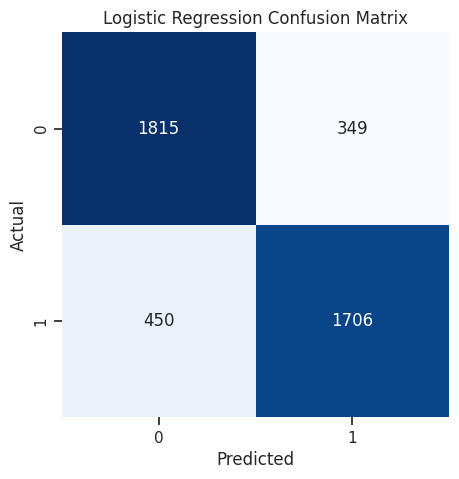

In [60]:
fig = plt.figure(figsize=(5, 5))
sns.heatmap(logistic_regression_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


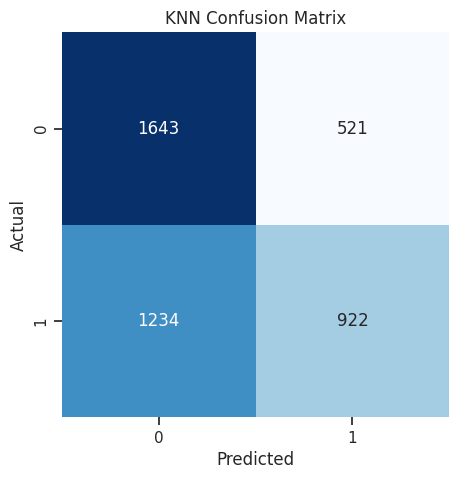

In [61]:
fig = plt.figure(figsize=(5, 5))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


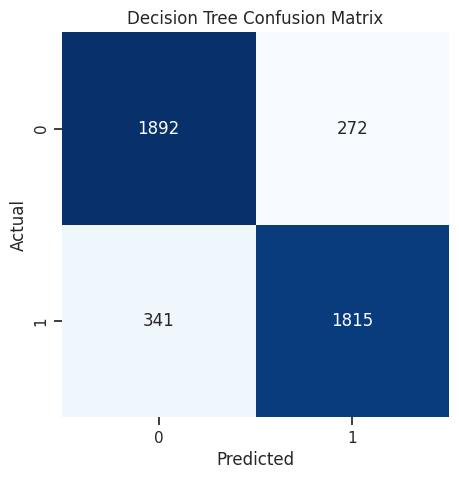

In [62]:
fig = plt.figure(figsize=(5, 5))
sns.heatmap(decision_tree_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### 3.2.2 Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV


In [ ]:
logistic_regression_model = LogisticRegression()

logistic_regression_parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                                    'solver' : ['lbfgs', 'saga', 'newton-cholesky']}

logistic_regression_grid_search = GridSearchCV(logistic_regression_model, logistic_regression_parameters, cv=5, scoring='accuracy', n_jobs=-1)

logistic_regression_grid_search.fit(X_train, y_train_modified)


In [65]:
logistic_regression_grid_results = pd.DataFrame(columns=['C', 'solver', 'accuracy on train', 'accuracy on test'])

logistic_regression_grid_results.loc['logistic_regression'] = [ logistic_regression_grid_search.best_params_['C'],
                                                                logistic_regression_grid_search.best_params_['solver'],
                                                                logistic_regression_grid_search.best_score_,
                                                                logistic_regression_grid_search.score(X_test, y_test_modified)]

logistic_regression_grid_results


,C,solver,accuracy on train,accuracy on test
logistic_regression,1000,newton-cholesky,0.8375,0.844444


In [ ]:
knn_model = KNeighborsClassifier()

knn_params = {'n_neighbors': np.arange(1, 25)}

knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)

knn_grid.fit(X_train, y_train_modified)


In [67]:
knn_grid_results = pd.DataFrame(columns=['neighbors', 'accuracy on train', 'accuracy on test'])

knn_grid_results.loc['knn'] = [knn_grid.best_params_['n_neighbors'], knn_grid.best_score_, knn_grid.score(X_test, y_test_modified)]

knn_grid_results


,neighbors,accuracy on train,accuracy on test
knn,9.0,0.592766,0.602546


In [ ]:
decision_tree_model = DecisionTreeClassifier()

decision_tree_params = {'splitter': ['best', 'random'],
                        'max_depth': [None, 5, 10, 15, 20],
                        'criterion': ['gini', 'entropy', 'log_loss'],
                        'ccp_alpha': np.arange(0.0, 1.0, 0.1)}

decision_tree_grid = GridSearchCV(decision_tree_model, decision_tree_params, cv=5, scoring='accuracy', n_jobs=-1)

decision_tree_grid.fit(X_train, y_train_modified)


In [69]:
decision_tree_grid_results = pd.DataFrame(columns=['splitter', 'max_depth', 'criterion', 'ccp_alpha', 'accuracy on train', 'accuracy on test'])

decision_tree_grid_results.loc['decision_tree'] = [decision_tree_grid.best_params_['splitter'],
                                                    decision_tree_grid.best_params_['max_depth'],
                                                    decision_tree_grid.best_params_['criterion'],
                                                    decision_tree_grid.best_params_['ccp_alpha'],
                                                    decision_tree_grid.best_score_,
                                                    decision_tree_grid.score(X_test, y_test_modified)]

decision_tree_grid_results


,splitter,max_depth,criterion,ccp_alpha,accuracy on train,accuracy on test
decision_tree,best,10,gini,0.0,0.879398,0.881481


#### 3.2.3 Overfitting and Underfitting

Underfitting and overfitting are two common problems that can occur when building machine learning models.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data. This can happen when the model has too few parameters or when the training data is not representative of the true population. An underfit model will have poor performance on both the training data and the test data, as it is not able to capture the complexity of the problem.

Overfitting occurs when a model is too complex and fits the training data too closely. This can happen when the model has too many parameters or when the training data is noisy or contains outliers. An overfit model will have excellent performance on the training data, but poor performance on the test data, as it has essentially memorized the training data and is not able to generalize to new data.

To avoid underfitting, it is important to choose a model that is complex enough to capture the underlying patterns in the data. This can be done by increasing the number of parameters in the model or by using a more complex model architecture. To avoid overfitting, it is important to use regularization techniques such as L1 or L2 regularization, dropout, or early stopping. These techniques help to prevent the model from fitting the training data too closely and encourage it to generalize to new data. Additionally, it is important to use a validation set to monitor the performance of the model on new data and to tune the hyperparameters of the model to achieve the best performance.

In our case, we can see that the model is not overfitting or underfitting the data, as the training and test scores are very close to each other.

#### 3.2.4 Effects of Preprocessing

Preprocessing is an important step in machine learning. It involves transforming the data into a format that is suitable for the model. This can include removing outliers, scaling the data, or transforming the data into a different representation. Preprocessing can have a significant impact on the performance of the model, as it can help to reduce overfitting and improve the generalization of the model.

### 3.3 Ensemble Methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_params = {'n_estimators': [10, 50, 100, 250],
                        'max_depth' : [10, None],
                        'max_features' : ['sqrt', None]}

random_forest_grid = GridSearchCV(random_forest_model, random_forest_params, cv=5, scoring='accuracy', n_jobs=-1)

random_forest_grid.fit(X_train, y_train_modified)


The ```n_estimators``` parameter controls the number of trees in the forest. The ```max_depth``` parameter controls the maximum depth of each tree in the forest. The ```min_samples_split``` parameter controls the minimum number of samples required to split a node. The ```min_samples_leaf``` parameter controls the minimum number of samples required to be at a leaf node. The ```max_features``` parameter controls the maximum number of features to consider when looking for the best split.

In [71]:
pd.DataFrame(random_forest_grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.416411,0.033673,0.017332,0.002736,10,sqrt,10,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.886285,0.895833,0.892361,0.894676,0.901620,0.894155,0.004980,15
1,1.962321,0.184202,0.047670,0.004739,10,sqrt,50,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.896991,0.894097,0.903935,0.905671,0.904514,0.901042,0.004615,11
2,3.571751,0.352648,0.082182,0.009553,10,sqrt,100,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.896991,0.893808,0.904803,0.904803,0.902488,0.900579,0.004429,12
3,8.368523,0.519753,0.247630,0.055006,10,sqrt,250,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.898438,0.898148,0.903067,0.906539,0.906250,0.902488,0.003637,10
4,1.468255,0.083191,0.011457,0.001181,10,None,10,"{'max_depth': 10, 'max_features': None, 'n_est...",0.892072,0.892361,0.899016,0.895544,0.900463,0.895891,0.003401,13
5,7.732525,0.409519,0.040404,0.002986,10,None,50,"{'max_depth': 10, 'max_features': None, 'n_est...",0.896123,0.900463,0.907407,0.905382,0.905961,0.903067,0.004185,9
6,15.336940,0.446281,0.077227,0.007732,10,None,100,"{'max_depth': 10, 'max_features': None, 'n_est...",0.900174,0.902488,0.907697,0.905671,0.904225,0.904051,0.002585,8
7,37.374933,0.955903,0.187758,0.013918,10,None,250,"{'max_depth': 10, 'max_features': None, 'n_est...",0.899016,0.903067,0.909722,0.904803,0.908275,0.904977,0.003811,4
8,0.482080,0.047738,0.015349,0.002896,None,sqrt,10,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.883391,0.894965,0.897280,0.900752,0.900752,0.895428,0.006407,14
9,2.014556,0.163895,0.051118,0.002641,None,sqrt,50,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.898727,0.902778,0.904225,0.903356,0.912616,0.904340,0.004548,7


In [72]:
random_forest_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'max_features', 'accuracy on train', 'accuracy on test'])

random_forest_results.loc['random_forest'] = [random_forest_grid.best_params_['n_estimators'],
                                                random_forest_grid.best_params_['max_depth'],
                                                random_forest_grid.best_params_['max_features'],
                                                random_forest_grid.best_score_,
                                                random_forest_grid.score(X_test, y_test_modified)]

random_forest_results


,n_estimators,max_depth,max_features,accuracy on train,accuracy on test
random_forest,250,None,sqrt,0.908565,0.916204


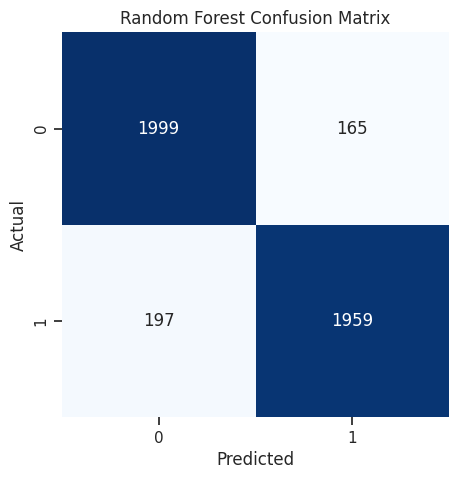

In [73]:
random_forest_predicted = random_forest_grid.predict(X_test)

random_forest_confusion_matrix = confusion_matrix(y_test_modified, random_forest_predicted)

fig = plt.figure(figsize=(5, 5))
sns.heatmap(random_forest_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### 3.4.1 Hyperparameter Tuning

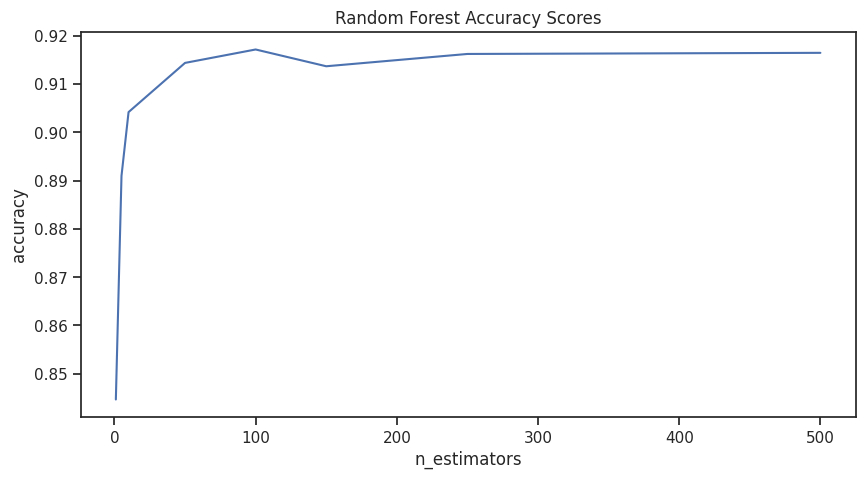

In [74]:
accuracy_scores = []
n_estimators = [1, 5, 10, 50, 100, 150, 250, 500]

for n_estimator in n_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=n_estimator, 
                                                max_depth=random_forest_grid.best_params_['max_depth'],
                                                max_features=random_forest_grid.best_params_['max_features'],
                                                n_jobs=-1)
    random_forest_model.fit(X_train, y_train_modified)
    accuracy_scores.append(random_forest_model.score(X_test, y_test_modified))

fig = plt.figure(figsize=(10, 5))
plt.plot(n_estimators, accuracy_scores)
plt.title('Random Forest Accuracy Scores')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
    

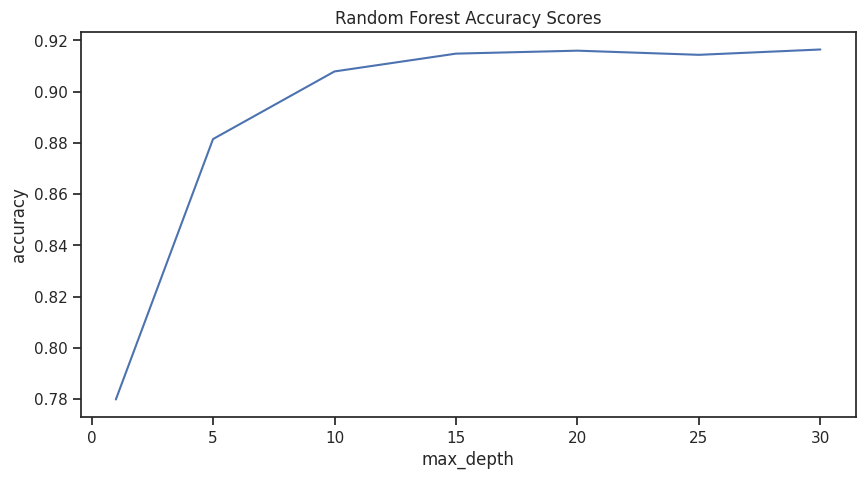

In [75]:
accuracy_scores = []
max_depths = [1, 5, 10, 15, 20, 25, 30, None]

for max_depth in max_depths:
    random_forest_model = RandomForestClassifier(n_estimators=random_forest_grid.best_params_['n_estimators'],
                                                max_depth=max_depth, 
                                                max_features=random_forest_grid.best_params_['max_features'],
                                                n_jobs=-1)
    random_forest_model.fit(X_train, y_train_modified)
    accuracy_scores.append(random_forest_model.score(X_test, y_test_modified))

fig = plt.figure(figsize=(10, 5))
plt.plot(max_depths, accuracy_scores)
plt.title('Random Forest Accuracy Scores')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()


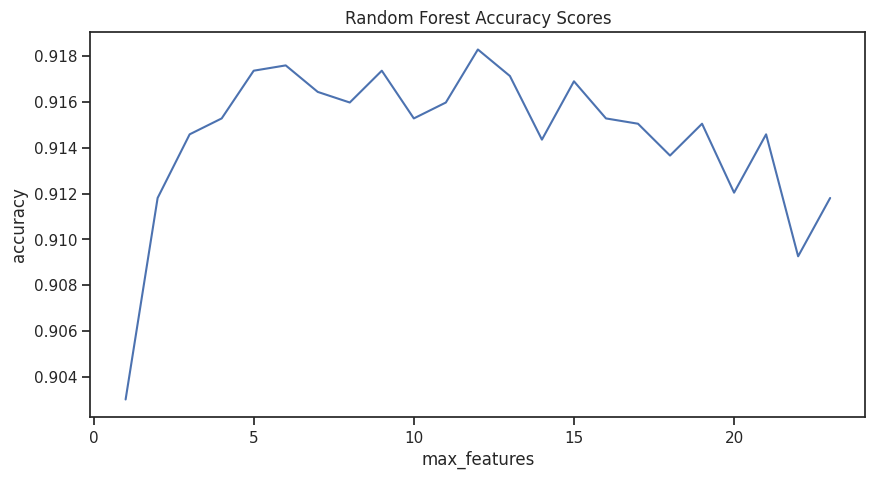

In [76]:
accuracy_scores = []
max_features = range(1, len(X_train.columns) + 1)

for max_feature in max_features:
    random_forest_model = RandomForestClassifier(n_estimators=random_forest_grid.best_params_['n_estimators'], 
                                                max_depth=random_forest_grid.best_params_['max_depth'],
                                                max_features=max_feature, 
                                                n_jobs=-1)
    random_forest_model.fit(X_train, y_train_modified)
    accuracy_scores.append(random_forest_model.score(X_test, y_test_modified))

fig = plt.figure(figsize=(10, 5))
plt.plot(max_features, accuracy_scores)
plt.title('Random Forest Accuracy Scores')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()


#### 3.4.2 Comparing With Decision Tree

In machine learning, bias and variance are two important concepts that help us understand the behavior and performance of models.

Bias refers to the error introduced by approximating a real-world problem with a simplified model. A model with high bias tends to oversimplify the underlying patterns in the data and make strong assumptions about the relationships between the features and the target variable. Such a model may consistently underfit the training data and perform poorly on both the training and test data. High bias can result in systematic errors and a lack of complexity in capturing the true nature of the problem.

Variance, on the other hand, refers to the sensitivity of a model to fluctuations in the training data. A model with high variance is highly flexible and capable of fitting the training data extremely well, often by capturing noise or random fluctuations. However, this flexibility can lead to overfitting, where the model fails to generalize well to unseen data. High variance models may have very low error on the training data, but they perform poorly on the test data.

The goal in machine learning is to strike a balance between bias and variance to achieve good predictive performance. This trade-off is known as the bias-variance trade-off. Models with low bias tend to have high variance, and vice versa. The ideal model is one that achieves low bias by capturing the relevant patterns in the data, while also having low variance to generalize well to unseen examples.

Various techniques can be employed to address bias and variance issues. For high-bias models, increasing the complexity (e.g., adding more features, using more sophisticated algorithms) can help reduce bias. On the other hand, for high-variance models, techniques like regularization, feature selection, and ensemble methods (such as bagging and boosting) can help reduce variance.

Understanding bias and variance helps in diagnosing model performance issues, selecting appropriate algorithms, optimizing hyperparameters, and improving the overall generalization capability of machine learning models.

In [77]:
from mlxtend.evaluate import bias_variance_decomp

loss, bias, variance = bias_variance_decomp(decision_tree_model, X_train.values, pd.DataFrame(y_train_modified).values, X_test.values, pd.DataFrame(y_test_modified).values, loss='mse', random_seed=1)

print('Bias: %.3f' % bias)
print('Variance: %.3f' % variance)



Bias: 1836.718
Variance: 0.075


In [ ]:
loss, bias, variance = bias_variance_decomp(random_forest_model, X_train.values, pd.DataFrame(y_train_modified).values, X_test.values, pd.DataFrame(y_test_modified).values, loss='mse', random_seed=1)

print('Bias: %.3f' % bias)
print('Variance: %.3f' % variance)

As we can see in the results, the random forest model has a lower bias and variance than the decision tree model. This is because the random forest model is an ensemble of decision trees, which helps to reduce the variance of the model. The random forest model also has a lower bias than the decision tree model, as it is able to capture more complex patterns in the data.

### 3.4 Gradient Boosting

#### 3.4.1 Boosting 

Gradient Boosting is a machine learning ensemble method used for both regression and classification tasks. It belongs to the family of boosting algorithms, which combine multiple weak models (often decision trees) to create a strong predictive model.

The basic idea behind gradient boosting is to iteratively build an ensemble of weak models, where each subsequent model focuses on reducing the errors made by the previous models. This is achieved by training each weak model to predict the residual errors (the difference between the actual target values and the predicted values) of the ensemble so far.

Here's a high-level overview of the gradient boosting process:

1. Initially, a simple model (usually a decision tree with a small depth) is trained on the given data.

2. The predictions of this model are then compared with the actual target values, and the residuals (the errors) are computed.

3. A new model is then trained to predict these residuals. This model is typically constructed to fit the residuals using a process called gradient descent, where it tries to find the best parameters that minimize the loss (e.g., mean squared error) between the predictions and the residuals.

4. The predictions of the new model are added to the predictions made by the previous models, updating the ensemble's overall predictions.

5. Steps 2 to 4 are repeated iteratively, with each new model focusing on the residuals of the ensemble so far. The models are trained sequentially, and each subsequent model tries to minimize the errors that the previous models could not capture.

6. The final prediction is obtained by combining the predictions of all the weak models in the ensemble, typically through a weighted average.

Gradient boosting effectively combines the predictions of multiple weak models, iteratively refining and improving upon the errors made by the ensemble. This results in a powerful predictive model with high accuracy.

There are several popular implementations of gradient boosting, such as XGBoost, LightGBM, and CatBoost, each offering various optimizations and enhancements to improve the training speed, memory usage, and predictive performance of the algorithm.

Boosting tree and decision tree are related concepts, but there are important differences between them:

Decision Tree:
A decision tree is a standalone machine learning algorithm that can be used for both regression and classification tasks. It recursively splits the data based on features to create a hierarchical structure of decisions and conditions. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a class label or a numerical value (in case of regression). The splits are made to minimize the impurity or maximize the information gain in the resulting subsets. Decision trees are known for their interpretability, as the resulting model can be easily visualized and understood.

Boosting Tree:
Boosting tree, on the other hand, refers to a family of algorithms that use the concept of boosting to combine multiple decision trees into an ensemble. Boosting is a technique that aims to improve the performance of weak models by sequentially adding new models that focus on the errors made by the previous models. Gradient Boosting (as described in the previous answer) is one popular variant of boosting tree algorithms.

Boosting tree algorithms, like gradient boosting, construct an ensemble of decision trees, where each tree is trained to predict the residuals or errors made by the previous trees. The final prediction of the ensemble is the aggregated result of the predictions made by all the individual trees. The main idea is to iteratively build a strong model by learning from the mistakes of the ensemble so far.

In summary, the key difference between decision trees and boosting trees is that decision trees are standalone models that use a single tree to make predictions, while boosting trees combine multiple decision trees in an ensemble to create a more powerful model. Boosting trees leverage the concept of boosting to sequentially improve the ensemble's performance by focusing on the errors made by the previous models.

#### 3.4.2 XGBoost

XGBoost (eXtreme Gradient Boosting) is a popular and powerful implementation of the gradient boosting algorithm. It is known for its high performance, scalability, and effectiveness in a wide range of machine learning tasks, including regression, classification, and ranking problems.

XGBoost builds upon the principles of gradient boosting and introduces several enhancements and optimizations to improve its efficiency and predictive performance. Some key features of XGBoost include:

1. Regularization: XGBoost incorporates regularization techniques to prevent overfitting and improve generalization. It includes both L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, allowing control over model complexity.

2. Tree-based Learning Algorithm: XGBoost employs a tree-based learning algorithm as its base model. It uses decision trees as weak learners and iteratively adds new trees to the ensemble, optimizing the objective function through gradient descent. It supports both classification and regression tasks and can handle missing values within the data.

3. Parallelization: XGBoost is designed for efficient parallel computation. It efficiently exploits multi-core processors and can utilize distributed computing frameworks like Apache Hadoop or Apache Spark. This makes it suitable for handling large datasets and training models at scale.

4. Handling Sparsity: XGBoost can efficiently handle sparse data, which is common in real-world applications. It employs a technique called "Compressed Sparse Column" to handle sparse matrices, reducing memory usage and speeding up computation.

5. Cross-Validation and Early Stopping: XGBoost supports cross-validation techniques to evaluate and tune the model during training. It also provides early stopping functionality, which stops the training process if the model's performance on a validation set does not improve for a specified number of iterations. This helps prevent overfitting and saves computational resources.

6. Feature Importance: XGBoost provides built-in feature importance estimation, allowing you to understand the relative importance of different features in the model's predictions. This can help with feature selection and interpretability.

XGBoost has gained popularity and has been widely adopted in various domains and machine learning competitions. It has achieved state-of-the-art results in many areas and is known for its speed, accuracy, and flexibility. It is available in multiple programming languages, including Python, R, Java, and others, making it accessible to a broad range of users.

#### 3.4.3 Training, Tuning, and Evaluation

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_params = {'n_estimators': [10, 50, 100, 250],
                'max_depth' : [10, None],
                'learning_rate': [0.01, 0.1, 0.5, 1.0]} 

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)

xgb_grid.fit(X_train, y_train_modified)


In [79]:
xgb_results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'accuracy on train', 'accuracy on test'])

xgb_results.loc['xgb'] = [xgb_grid.best_params_['n_estimators'],
                            xgb_grid.best_params_['max_depth'],
                            xgb_grid.best_params_['learning_rate'],
                            xgb_grid.best_score_,
                            xgb_grid.score(X_test, y_test_modified)]

xgb_results


,n_estimators,max_depth,learning_rate,accuracy on train,accuracy on test
xgb,250.0,NaN,0.1,0.913831,0.923611


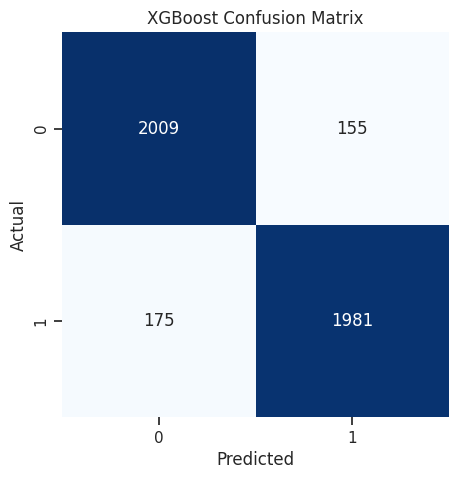

In [80]:
xgb_predicted = xgb_grid.predict(X_test)

xgb_confusion_matrix = confusion_matrix(y_test_modified, xgb_predicted)

fig = plt.figure(figsize=(5, 5))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
